In [9]:
! pip install duckdb

- Grup A: Kontrol grubu 
- Grup B: Her seviyede +3 hamle
- Grup C: Her seviyede -3 hamle

In [72]:
import duckdb #SQL'i python'a entegre etmek için kullanıyorum.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Önce her bir tabloya hızlıca göz atalım:

In [11]:
duckdb.query("SELECT * FROM Install.csv limit 5")

┌─────────┬────────────────────────────┐
│ user_id │        install_time        │
│  int64  │         timestamp          │
├─────────┼────────────────────────────┤
│       1 │ 2022-10-27 10:07:57.347003 │
│       2 │ 2022-10-27 14:44:46.518055 │
│       3 │ 2022-10-27 06:12:58.710009 │
│       4 │ 2022-10-27 11:06:12.127003 │
│       5 │ 2022-10-19 21:59:16.415    │
└─────────┴────────────────────────────┘

In [12]:
duckdb.query("SELECT * FROM AbEnter.csv limit 5")

┌─────────┬──────────┐
│ user_id │ ab_group │
│  int64  │ varchar  │
├─────────┼──────────┤
│   12792 │ A        │
│    7922 │ A        │
│    7044 │ A        │
│    8160 │ A        │
│    3518 │ A        │
└─────────┴──────────┘

In [13]:
duckdb.query("SELECT * FROM LevelStart.csv limit 5")

┌─────────┬───────┬───────────┬───────┬────────────────────────────┐
│ user_id │ level │ try_count │ coin  │            time            │
│  int64  │ int64 │   int64   │ int64 │         timestamp          │
├─────────┼───────┼───────────┼───────┼────────────────────────────┤
│    5653 │   119 │        60 │   230 │ 2023-01-17 01:55:41.427053 │
│    5653 │   119 │        61 │   230 │ 2023-01-17 01:56:56.531065 │
│    5653 │   119 │        51 │   230 │ 2023-01-17 01:44:53.83703  │
│    5653 │   124 │        33 │   330 │ 2023-01-19 16:16:48.850017 │
│    5653 │   124 │        29 │   330 │ 2023-01-19 16:13:01.390017 │
└─────────┴───────┴───────────┴───────┴────────────────────────────┘

In [14]:
duckdb.query("SELECT * FROM LevelEnd.csv limit 5")

┌─────────┬───────┬───────────┬─────────┬────────────────────────────┐
│ user_id │ level │ try_count │ status  │            time            │
│  int64  │ int64 │   int64   │ varchar │         timestamp          │
├─────────┼───────┼───────────┼─────────┼────────────────────────────┤
│    5653 │   123 │        19 │ Failure │ 2023-01-18 22:02:33.492023 │
│    5653 │   123 │        22 │ Failure │ 2023-01-19 01:23:09.836029 │
│    5653 │   123 │        25 │ Failure │ 2023-01-19 05:47:56.653016 │
│    5653 │   123 │        26 │ Failure │ 2023-01-19 05:49:40.038028 │
│    5653 │   123 │        21 │ Failure │ 2023-01-19 01:21:17.672015 │
└─────────┴───────┴───────────┴─────────┴────────────────────────────┘

In [15]:
duckdb.query("SELECT * FROM Session.csv limit 5")

┌─────────┬─────────────┬────────────────────────────┬────────────┬───────┐
│ user_id │ session_num │            time            │ time_spent │ level │
│  int64  │   double    │         timestamp          │   int64    │ int64 │
├─────────┼─────────────┼────────────────────────────┼────────────┼───────┤
│    7368 │        25.0 │ 2022-10-21 08:11:43.43706  │         30 │   174 │
│    7368 │        25.0 │ 2022-10-21 07:47:22.54801  │          4 │   168 │
│    7368 │        25.0 │ 2022-10-21 08:04:24.77108  │         30 │   173 │
│    7368 │        25.0 │ 2022-10-21 07:59:54.611068 │         30 │   170 │
│    8367 │        33.0 │ 2022-10-21 23:10:20.63102  │         30 │   194 │
└─────────┴─────────────┴────────────────────────────┴────────────┴───────┘

In [16]:
duckdb.query("SELECT * FROM CoinSpend.csv limit 5")

┌─────────┬───────┬───────────┬─────────┬───────────────────┐
│ user_id │ level │ try_count │  item   │ spend_coin_amount │
│  int64  │ int64 │   int64   │ varchar │       int64       │
├─────────┼───────┼───────────┼─────────┼───────────────────┤
│    8275 │    85 │        12 │ Ego     │               900 │
│   12861 │    57 │         2 │ Ego     │               900 │
│    2459 │    76 │         2 │ Ego     │               900 │
│    8656 │   109 │         1 │ Booster │               500 │
│    5653 │    65 │         6 │ Ego     │               900 │
└─────────┴───────┴───────────┴─────────┴───────────────────┘

In [ ]:
#user id üzerinden install ve A-B-C grubu birleşmesi

ab_df=duckdb.query("""
    SELECT i.user_id, i.install_time, a.ab_group
    FROM 'Install.csv' i
    LEFT JOIN 'AbEnter.csv' a
    ON i.user_id = a.user_id
""").df()


In [19]:
# Her grupta kaçar kişi var:

ab_df["ab_group"].value_counts()

ab_group
B    4473
A    4441
C    4409
Name: count, dtype: int64

In [19]:
ab_df.head()

,user_id,install_time,ab_group
0,1,2022-10-27 10:07:57.347003,B
1,2,2022-10-27 14:44:46.518055,B
2,3,2022-10-27 06:12:58.710009,A
3,4,2022-10-27 11:06:12.127003,B
4,5,2022-10-19 21:59:16.415000,B


In [ ]:
# LevelEnd tablosundaki level denemelerine ait başarı bilgisini, A-B-C gruplarına göre belirleyelim.
level_success_df = duckdb.query("""
    SELECT le.user_id, le.level, le.try_count, le.status, a.ab_group
    FROM 'LevelEnd.csv' le
    JOIN ab_df a
    ON le.user_id = a.user_id
""").df()


In [35]:
level_success_df

,user_id,level,try_count,status,ab_group
0,551,133,2,Success,A
1,6712,108,1,Success,B
2,6625,95,1,Success,A
3,6625,111,2,Success,A
4,13148,178,1,Failure,C
...,...,...,...,...,...
1027919,9356,30,1,Success,A
1027920,8971,30,1,Success,B
1027921,3980,30,1,Success,C
1027922,9330,30,1,Success,B


In [ ]:
# ort. deneme sayısı 
ort_try_count = level_success_df.groupby("ab_group")["try_count"].agg(
    total_entries="count",
    ort_try_count="mean"
)
ort_try_count 

,total_entries,ort_try_count
ab_group,,
A,341321,1.400324
B,330707,1.203685
C,355896,2.171724


Ort. deneme sayısı -3 hamle grubu için artmış. B grubu için ise azalmış.

/var/folders/k0/jmg45zjj0mb280sfvmx9fn8c0000gn/T/ipykernel_21842/2173633895.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ort_try_count, x="ab_group", y="ort_try_count", palette="muted")


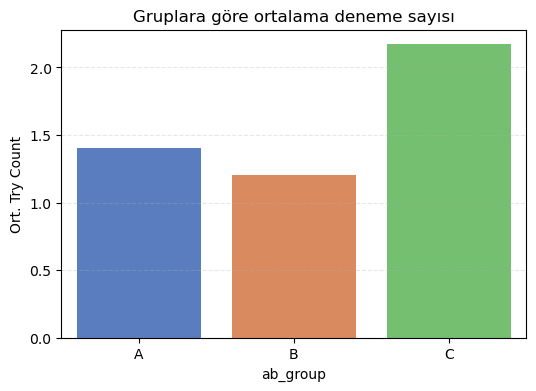

In [78]:
ort_try_count.reset_index(inplace=True)

plt.figure(figsize=(6,4))
sns.barplot(data=ort_try_count, x="ab_group", y="ort_try_count", palette="muted")
plt.title("Gruplara göre ortalama deneme sayısı")
plt.ylabel("Ort. Try Count")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()


In [ ]:
# başarı durumuna bakalım:
success_stats = level_success_df.groupby("ab_group")["status"].agg(
    total_attempts="count",
    success_count=lambda x: (x == "Success").sum()
)
success_stats["success_rate"] = success_stats["success_count"] / success_stats["total_attempts"]
success_stats

,total_attempts,success_count,success_rate
ab_group,,,
A,341321,297484,0.871567
B,330707,308728,0.933539
C,355896,269382,0.756912


/var/folders/k0/jmg45zjj0mb280sfvmx9fn8c0000gn/T/ipykernel_21842/2512271446.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=success_stats, x="ab_group", y="success_rate", palette="pastel")


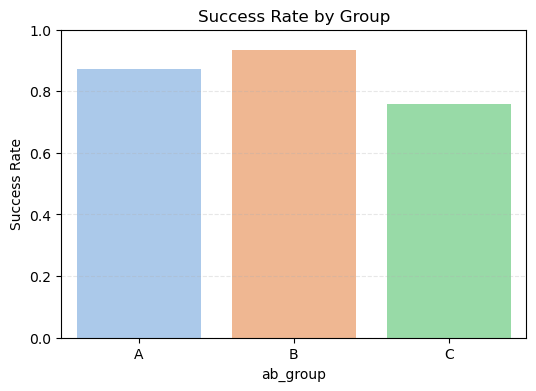

In [75]:
# Bu oranı görselleştirelim:

success_stats.reset_index(inplace=True)

plt.figure(figsize=(6,4))
sns.barplot(data=success_stats, x="ab_group", y="success_rate", palette="pastel")
plt.title("Success Rate by Group")
plt.ylabel("Success Rate")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()


B grubu (+3 hamle) en yüksek başarı, C grubu (-3 hamle) en düşük başarı. Zorluk seviyesindeki artış oyuncuları zorlamış.

In [ ]:
coin_spend_df = duckdb.query("""
    SELECT cs.user_id, cs.level, cs.try_count, cs.item, cs.spend_coin_amount, a.ab_group
    FROM 'CoinSpend.csv' cs
    JOIN ab_df a
    ON cs.user_id = a.user_id
""").df()


In [43]:
coin_spend_df

,user_id,level,try_count,item,spend_coin_amount,ab_group
0,8275,85,12,Ego,900,B
1,12861,57,2,Ego,900,C
2,2459,76,2,Ego,900,C
3,8656,109,1,Booster,500,A
4,5653,65,6,Ego,900,C
...,...,...,...,...,...,...
59986,10323,54,2,Ego,900,A
59987,11275,113,2,Ego,900,B
59988,11275,112,2,Ego,900,B
59989,11275,107,2,Ego,900,B


In [47]:
coin_spend_df.groupby("ab_group")["spend_coin_amount"].sum() # toplam harcama

ab_group
A    19143200
B    15644350
C    20917950
Name: spend_coin_amount, dtype: int64

In [48]:
coin_spend_df.groupby("ab_group")["spend_coin_amount"].mean() # kullanıcı başına ort. harcama


ab_group
A    932.631784
B    938.585913
C    917.574681
Name: spend_coin_amount, dtype: float64

toplam harcamada C grubu lider olmasına rağmen kişi başı ort. harcamada B grubu lider. Bunun anlamı C grubunda (-3 hamle) daha fazla kişi daha düşük tutarda harcama yapmış, B grubunda ise daha az kişi daha fazla harcama yapmış. 

In [ ]:
#En çok satılan ürün sıralamsı
coin_spend_df["item"].value_counts()


item
Ego        51275
Booster     6787
Life        1929
Name: count, dtype: int64

Kullanıcılar daha çok Ego almayı tercih ediyor.

In [ ]:
#Asıl grup bazlı harcamalara bakacak olursak;

coin_spend_df.groupby(["ab_group", "item"])["spend_coin_amount"].sum()


ab_group  item   
A         Booster     1394400
          Ego        16586000
          Life        1162800
B         Booster     1626950
          Ego        12533500
          Life        1483900
C         Booster     1250550
          Ego        18649000
          Life        1018400
Name: spend_coin_amount, dtype: int64

Ego'ya harcanan paranın diğerlerinden daha fazla olduğunu görüyoruz. C (-3 hamle) grubu oyuncuları yeni can almak yerine Ego'dan yardım almayı tercih etmiş. Oyuncular etkili çözüm olarak Ego'yu görüyorlar. 

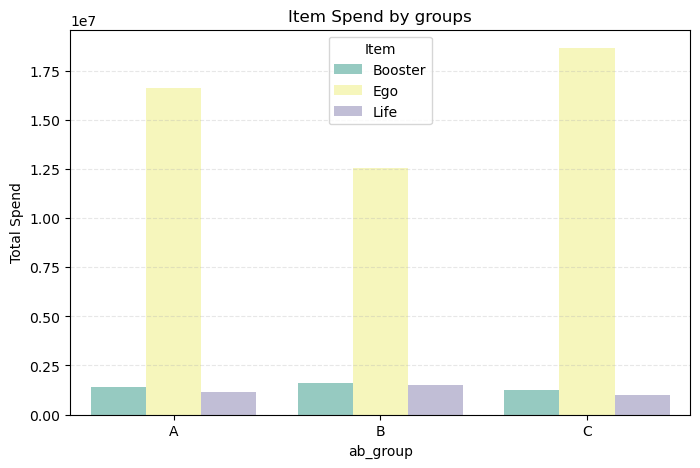

In [83]:
item_pivot = coin_spend_df.groupby(["ab_group", "item"])["spend_coin_amount"].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=item_pivot, x="ab_group", y="spend_coin_amount", hue="item", palette="Set3")
plt.title("Item Spend by groups")
plt.ylabel("Total Spend")
plt.legend(title="Item")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()


In [ ]:
session_df = duckdb.query("""
    SELECT s.user_id, s.session_num, s.time_spent, a.ab_group
    FROM 'Session.csv' s
    JOIN ab_df a
    ON s.user_id = a.user_id
""").df()


In [53]:
session_df

,user_id,session_num,time_spent,ab_group
0,3510,1.0,30,C
1,3510,1.0,30,C
2,3510,1.0,30,C
3,3510,1.0,30,C
4,3636,1.0,30,B
...,...,...,...,...
4251841,3419,11.0,31,A
4251842,3419,11.0,30,A
4251843,3419,11.0,30,A
4251844,3419,11.0,30,A


kullanıcılara ait aynı oturumda aynı sürelerde kayıtlar var. Bunları birleştirelim ve öyle devam edelim:

In [58]:
session_total = session_df.groupby(["user_id", "session_num", "ab_group"])["time_spent"].sum().reset_index()


In [59]:
session_total

,user_id,session_num,ab_group,time_spent
0,1,2.0,B,8
1,1,3.0,B,6
2,2,1.0,B,2696
3,2,2.0,B,3956
4,2,3.0,B,2085
...,...,...,...,...
81613,13321,3.0,A,5810
81614,13321,4.0,A,417
81615,13321,5.0,A,2084
81616,13322,1.0,B,218


In [60]:
session_total.groupby("ab_group")["time_spent"].mean()


ab_group
A    1536.564596
B    1599.238364
C    1419.205112
Name: time_spent, dtype: float64

B Grubu (+3 hamle) oyuncuları en uzun süre oyunda kalmış. Bu grup daha az zorlanıyor ve daha keyif alıyor olabilir. C grubuna bakarsak, zorluk artışı, kullanıcıların oyunda kalma süresini azaltmış.

/var/folders/k0/jmg45zjj0mb280sfvmx9fn8c0000gn/T/ipykernel_21842/2654854719.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=session_avg_time, x="ab_group", y="time_spent", palette="Set2")


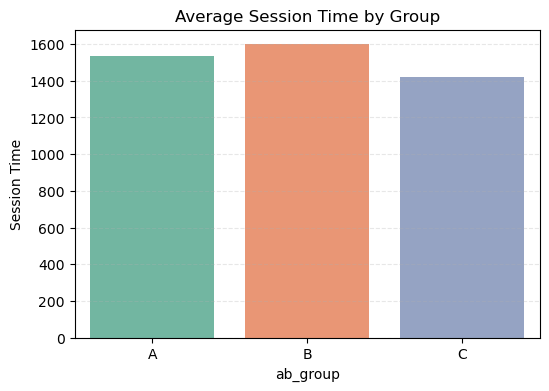

In [81]:
session_avg_time = session_total.groupby("ab_group")["time_spent"].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=session_avg_time, x="ab_group", y="time_spent", palette="Set2")
plt.title("Average Session Time by Group")
plt.ylabel("Session Time")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()


In [61]:
session_total.groupby("ab_group")["session_num"].count()


ab_group
A    27076
B    25826
C    28716
Name: session_num, dtype: int64

In [ ]:
level_start_df = duckdb.query("""
    SELECT ls.user_id, ls.level, ls.try_count, a.ab_group
    FROM 'LevelStart.csv' ls
    JOIN ab_df a
    ON ls.user_id = a.user_id
""").df()


In [64]:
level_start_df

,user_id,level,try_count,ab_group
0,6455,139,3,B
1,6455,146,2,B
2,6455,128,1,B
3,6455,141,1,B
4,6455,133,1,B
...,...,...,...,...
1112962,440,53,1,B
1112963,4473,53,1,A
1112964,9399,53,1,C
1112965,4060,53,1,A


In [ ]:
# Bir leveli 10 kereden fazla deneyen kullanıcıların sayısı
level_start_df[level_start_df["try_count"] > 10].groupby("ab_group")["user_id"].count()


ab_group
A    2391
B    1026
C    7760
Name: user_id, dtype: int64

(-3) hamle verilen C grubu zorlandığı için bir leveli 10 kereden fazla denediği bile oluyor. Ort try countların açık ara en fazla oldugu grup C grubu.

In [ ]:
# Grupların Ortalama deneme sayısı
level_start_df.groupby("ab_group")["try_count"].mean()

ab_group
A    1.398342
B    1.202179
C    2.168214
Name: try_count, dtype: float64

In [71]:
# ortalama deneme sayısı ortalaması en yüksek 10 level (yani zorluğu yüksek 10 level)
level_start_df.groupby("level")["try_count"].mean().sort_values(ascending=False).head(10)


level
90     8.127574
64     5.897102
108    5.178218
124    5.042805
97     3.279066
116    3.094807
87     2.944274
168    2.931080
178    2.925247
188    2.790731
Name: try_count, dtype: float64